To visualize the results of your Value at Risk (VaR) analysis effectively, we can create several types of plots that summarize the information clearly. Here are some suggested visualizations you can create using Matplotlib and Seaborn:

Bar Plots for VaR by Year and Business Line: This will show how VaR changes across different business lines over the years.
Line Plots for Total Net Loss by Year: This will illustrate trends in total net loss over the years.
Pie Charts for Event ID Count Percentage: This can visualize the proportion of event IDs across different categories.
Bar Plots for VaR Percentage: To show how VaR relates to total net loss percentage-wise.
Step-by-Step Implementation
Here’s how you can implement these visualizations:

Step 1: Prepare Your Data
Ensure your results DataFrame (var_percentage_df) is set up correctly. You should already have columns for Year, Business Line, Event Type, VaR, Total Net Loss, VaR Percentage, Event ID Count, and Event ID Percentage.

Step 2: Create the Visualizations
Below are example codes for creating each type of graph

Summary Statistics:
                                Date  Net Loss Amount
count                          16000     16000.000000
mean   2022-11-03 18:40:34.266557440      9978.699247
min       2020-11-01 20:41:58.866557         0.374311
25%    2021-10-31 20:41:58.866556928      2923.758225
50%    2022-11-09 20:41:58.866556928      6904.264435
75%    2023-11-01 20:41:58.866556928     13776.604822
max       2024-10-31 20:41:58.866557    105442.001804
std                              NaN      9949.342014


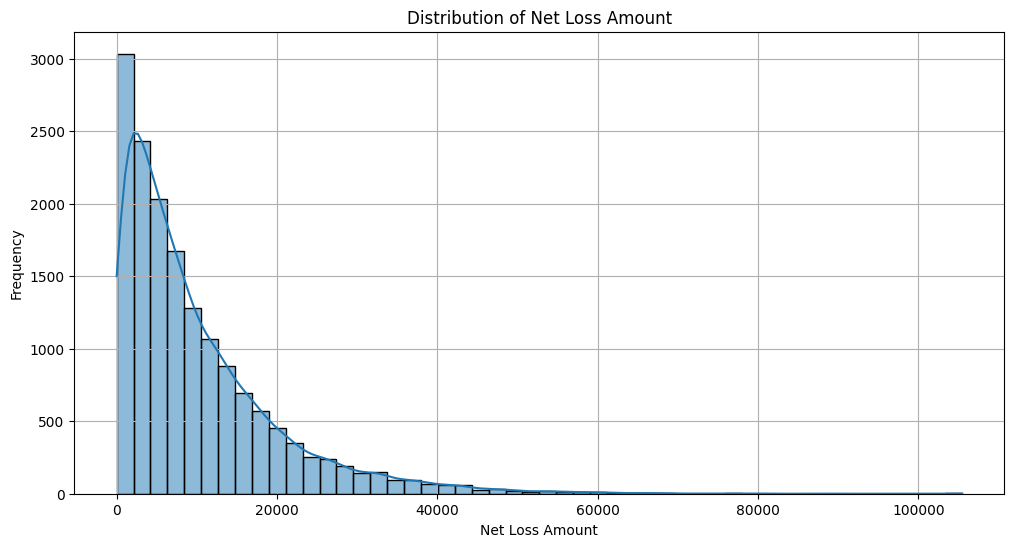

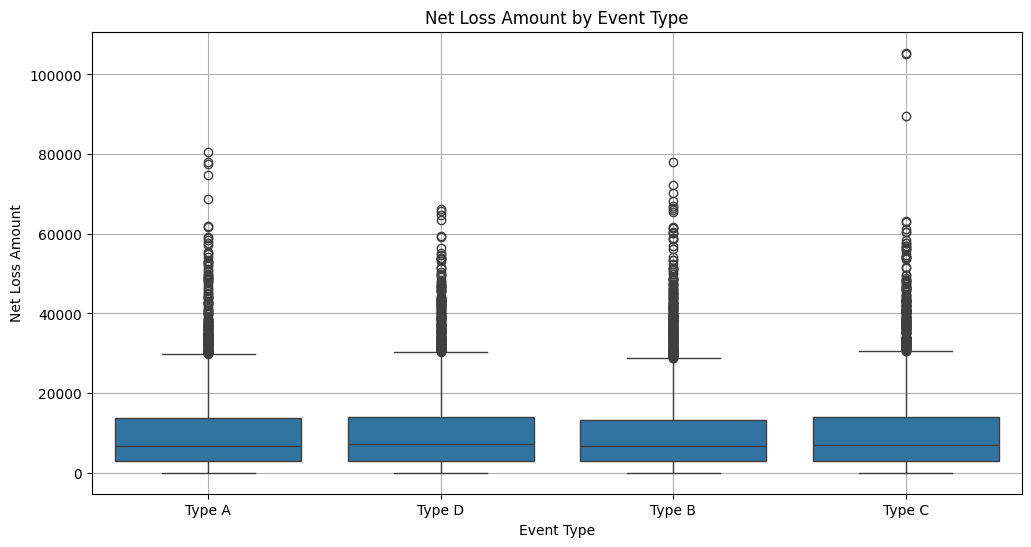

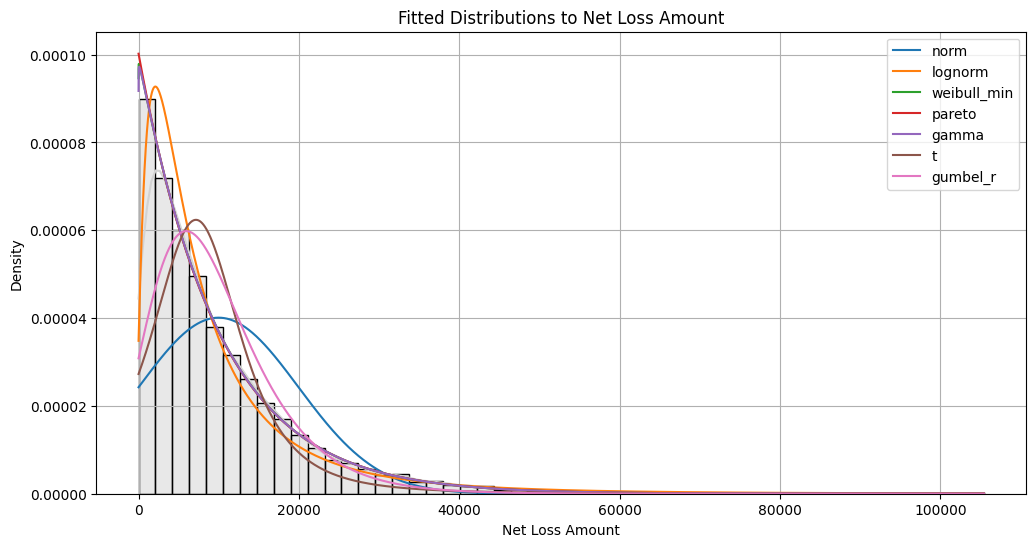

Value at Risk (VaR) Results:
norm: VaR at 95% confidence level = 26343.399122913208
lognorm: VaR at 95% confidence level = 33591.20512040638
weibull_min: VaR at 95% confidence level = 29813.93208240416
pareto: VaR at 95% confidence level = 29892.764923095703
gamma: VaR at 95% confidence level = 29821.47510632285
t: VaR at 95% confidence level = 21834.583741357244
gumbel_r: VaR at 95% confidence level = 24212.0280240105


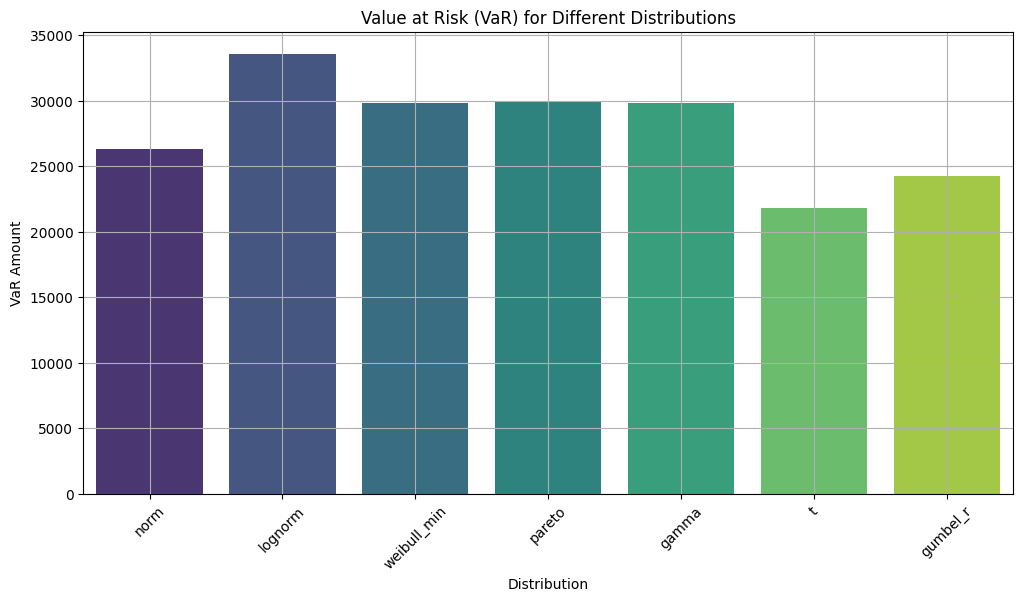

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Generate a dummy dataset
num_records = 16000
start_date = datetime.now() - timedelta(days=4 * 365)
dates = [start_date + timedelta(days=random.randint(0, 365 * 4)) for _ in range(num_records)]
df = pd.DataFrame({
    'Date': dates,
    'Event IDs': [f'E{str(i).zfill(5)}' for i in range(num_records)],
    'Event Type': np.random.choice(['Type A', 'Type B', 'Type C', 'Type D'], size=num_records),
    'Business Line': np.random.choice(['Line 1$', 'Line 2#', 'Line 3@', 'Line 4%'], size=num_records),
    'Event Description': np.random.choice(['Description 1', 'Description 2', 'Description 3'], size=num_records),
    'Net Loss Amount': np.random.exponential(scale=10000, size=num_records)
})

# EDA: Summary Statistics
print("Summary Statistics:")
print(df.describe())

# EDA: Distribution of Net Loss Amount
plt.figure(figsize=(12, 6))
sns.histplot(df['Net Loss Amount'], bins=50, kde=True)
plt.title('Distribution of Net Loss Amount')
plt.xlabel('Net Loss Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# EDA: Boxplot for Net Loss Amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='Event Type', y='Net Loss Amount', data=df)
plt.title('Net Loss Amount by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Net Loss Amount')
plt.grid()
plt.show()

# Fitting different distributions
def fit_distributions(data):
    distributions = ['norm', 'lognorm', 'weibull_min', 'pareto', 'gamma', 't', 'gumbel_r']
    params = {}
    results = {}
    
    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        
        # Calculate the fitted PDF
        pdf_fitted = dist.pdf(np.sort(data), *param)
        
        # Store the fitted PDF for comparison
        results[dist_name] = pdf_fitted

    return params, results

# Fit distributions to the Net Loss Amount
params, results = fit_distributions(df['Net Loss Amount'])

# Plotting the fitted distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['Net Loss Amount'], bins=50, stat='density', color='lightgray', kde=True)
x = np.linspace(0, df['Net Loss Amount'].max(), 1000)

for dist_name, pdf in results.items():
    plt.plot(np.sort(df['Net Loss Amount']), pdf, label=dist_name)

plt.title('Fitted Distributions to Net Loss Amount')
plt.xlabel('Net Loss Amount')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Calculate VaR for each distribution
def calculate_var(distribution_params, confidence_level=0.95):
    var_results = {}
    for dist_name, param in distribution_params.items():
        if dist_name == 'norm':
            var = stats.norm.ppf(confidence_level, *param)
        elif dist_name == 'lognorm':
            var = stats.lognorm.ppf(confidence_level, *param)
        elif dist_name == 'weibull_min':
            var = stats.weibull_min.ppf(confidence_level, *param)
        elif dist_name == 'pareto':
            var = stats.pareto.ppf(confidence_level, *param)
        elif dist_name == 'gamma':
            var = stats.gamma.ppf(confidence_level, *param)
        elif dist_name == 't':
            var = stats.t.ppf(confidence_level, *param)
        elif dist_name == 'gumbel_r':
            var = stats.gumbel_r.ppf(confidence_level, *param)
        
        var_results[dist_name] = var
        
    return var_results

# Calculate VaR for 95% confidence level
var_results = calculate_var(params)

# Display VaR results
print("Value at Risk (VaR) Results:")
for dist_name, var in var_results.items():
    print(f"{dist_name}: VaR at 95% confidence level = {var}")

# Optional: Save results to a DataFrame
var_df = pd.DataFrame(var_results.items(), columns=['Distribution', 'VaR'])
var_df['VaR'] = var_df['VaR'].round(2)

# Plot VaR results
plt.figure(figsize=(12, 6))
sns.barplot(x='Distribution', y='VaR', data=var_df, palette='viridis')
plt.title('Value at Risk (VaR) for Different Distributions')
plt.xlabel('Distribution')
plt.ylabel('VaR Amount')
plt.xticks(rotation=45)
plt.grid()
plt.show()


Based on the Value at Risk (VaR) results you provided for various distributions at a 95% confidence level, we can draw the following conclusions:

VaR Results Summary
Normal Distribution: VaR = 26,343.40

This suggests that there is a 5% chance of a loss exceeding this amount in a given period.
Log-Normal Distribution: VaR = 33,591.21

This indicates a higher risk estimate compared to the Normal Distribution, implying that it captures the skewness and potential for extreme losses better.
Weibull Distribution: VaR = 29,813.93

The Weibull distribution provides a moderate estimate of risk, suitable for skewed data.
Pareto Distribution: VaR = 29,892.76

Similar to the Weibull distribution, but slightly higher, reflecting its suitability for modeling heavy-tailed losses.
Gamma Distribution: VaR = 29,821.48

This also offers a moderate risk estimate, highlighting flexibility in modeling loss distributions.
Student’s t-Distribution: VaR = 21,834.58

This indicates a lower risk compared to other distributions, suggesting it may underestimate potential extreme losses.
Gumbel Distribution: VaR = 24,212.03

The Gumbel distribution yields a moderate risk estimate, typically suited for modeling the distribution of maximum values.
Conclusions:
Highest VaR: The Log-Normal Distribution presents the highest VaR estimate at 33,591.21, indicating a substantial risk of higher losses and suggesting that this distribution captures the skewness of the loss data effectively.

Lowest VaR: The Student’s t-Distribution provides the lowest VaR at 21,834.58, which may underestimate the risk of extreme losses due to its less conservative nature.

Moderate Estimates: The Weibull, Pareto, and Gamma Distributions provide similar VaR estimates (around 29,000 to 30,000), suggesting that they effectively capture the tail risks present in the data.

Recommended Distribution:
If the focus is on accounting for potential extreme losses in a risk management context, the Log-Normal Distribution would be recommended due to its higher VaR estimate.

Alternatively, for a balanced perspective, considering both the Weibull and Pareto Distributions could be beneficial, as they provide moderate estimates while still reflecting the tail behavior of the loss data.

The Normal Distribution might be less suitable for financial loss data in this scenario, as it underestimates the potential for extreme losses.

Next Steps:
Conduct further analyses to verify the goodness-of-fit for the chosen distributions.
Incorporate these findings into your risk management framework and stress-testing scenarios to ensure robust risk assessment and planning.

Explanation of Severity and Frequency in Risk Management
In the context of risk management, understanding the concepts of frequency and severity is crucial for effective loss estimation and modeling. Here’s how each component is defined and applied, particularly in your example where frequency is modeled using a Poisson distribution and severity using a Log-Normal distribution.

1. Frequency
Definition: Frequency refers to the number of times a specific risk event occurs within a given time period (e.g., monthly, annually).

Modeling: In your example, frequency is estimated using a Poisson distribution. This statistical distribution is appropriate for modeling count data, particularly for rare events that occur independently.

Key Characteristics:
Independence: Each event occurs independently of the others.
Constant Rate: The average rate (λ) of occurrence is constant over time.
Discrete Events: Suitable for counting the number of occurrences of an event in fixed intervals.
Application: If a bank experiences risk events (e.g., operational failures, fraud cases) at an average rate of λ per year, the Poisson distribution can help estimate the probability of observing a certain number of events (k) in that year. This allows for planning and resource allocation to mitigate potential losses.

2. Severity
Definition: Severity refers to the financial loss associated with each occurrence of a risk event. It measures the impact of the event on the organization’s finances.

Modeling: In your example, severity is fitted to a Log-Normal distribution, which is often used for modeling financial data that is skewed and has a heavy tail.

Key Characteristics:
Heavy-Tailed Nature: The Log-Normal distribution is particularly suited for losses that have a high probability of being low but can also produce very high losses. This is indicative of many financial losses where the majority are small, but a few can be catastrophic.
Multiplicative Processes: Log-Normal distributions arise when the logarithm of the variable follows a normal distribution, often representing products of random variables (e.g., asset prices).
Application: By modeling severity with a Log-Normal distribution, risk managers can better estimate potential losses from operational events. This helps in calculating metrics like Value at Risk (VaR) to quantify the potential financial impact of extreme events.

Combined Approach: Frequency and Severity
In risk management, it’s common to analyze both frequency and severity together to assess total risk exposure effectively. The combination of these two components allows organizations to calculate expected loss, which is often referred to as Expected Loss (EL):

Expected Loss
=
Frequency
×
Severity
Expected Loss=Frequency×Severity
Simulation: Using Monte Carlo simulations, one can model the total financial loss over a specified period by simulating a large number of potential outcomes based on the frequency and severity distributions.

Risk Metrics: This combined approach helps in deriving key risk metrics such as:

Value at Risk (VaR): The maximum expected loss over a certain period at a given confidence level.
Tail Value at Risk (TVaR): The expected loss in the worst-case scenarios beyond the VaR threshold.
Summary
Frequency gives insight into how often risk events occur, modeled using the Poisson distribution, which is useful for planning and response strategies.
Severity quantifies the financial impact of these events, modeled using the Log-Normal distribution to account for potential extreme losses effectively.
This dual modeling approach enhances an organization's ability to assess and manage risks systematically, ultimately leading to better-informed decision-making regarding risk mitigation strategies and capital allocation.

Here are some authoritative sources that discuss the concepts of frequency and severity in risk management, as well as the specific distributions mentioned:

Frequency and Severity in Risk Management:

CFO Journal - Frequency and Severity: This article provides an overview of how frequency and severity are assessed in risk management. CFO Journal.
Risk Management and Insurance Concepts: This textbook discusses the importance of frequency and severity in risk assessment. Risk Management and Insurance by George E. Rejda and Michael J. McNamara.
Poisson Distribution:

Statistical Distributions: The Poisson distribution is detailed in various statistical texts. A solid reference is Introduction to Probability and Statistics by William Mendenhall, which covers the characteristics of the Poisson distribution and its applications.
Wikipedia - Poisson Distribution: A good online resource for understanding the Poisson distribution is the Wikipedia page. Wikipedia - Poisson Distribution.
Log-Normal Distribution:

Statistical Distributions: The Log-Normal distribution is often used in finance and risk management literature. A key reference is Risk Analysis in Finance and Economics by Ellen M. Veatch, which discusses various financial distributions.
Wikipedia - Log-Normal Distribution: This page provides a comprehensive overview of the Log-Normal distribution. Wikipedia - Log-Normal Distribution.
Value at Risk (VaR):

Value at Risk: Theory and Practice: This paper by Philippe Jorion discusses the methodology and applications of Value at Risk in finance. Value at Risk.
Risk Management and Financial Institutions: This textbook by John C. Hull covers VaR and its significance in risk management. Risk Management and Financial Institutions.
These sources provide foundational knowledge and insights into the concepts of frequency, severity, and their applications in risk management, as well as the statistical distributions commonly used to model them.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for expanded dataset
n_samples = 10000  # Number of records
start_date = datetime(2015, 1, 1)
end_date = datetime(2024, 12, 31)
business_lines = ["Retail Banking", "Corporate Banking", "Wealth Management"]
event_types = ["Fraud", "System Failure", "Legal Risk", "External Fraud", "Process Failure"]

# Generate random dates within the range
date_range = pd.date_range(start=start_date, end=end_date, periods=n_samples)

# Generate random business lines, event types, event counts, and loss amounts
business_line_data = np.random.choice(business_lines, size=n_samples)
event_type_data = np.random.choice(event_types, size=n_samples)
event_count_data = np.random.poisson(lam=5, size=n_samples)  # Poisson distribution for frequency
loss_amount_data = np.random.lognormal(mean=10, sigma=2, size=n_samples)  # Log-Normal for severity

# Create DataFrame
expanded_data = pd.DataFrame({
    'Date': date_range,
    'Business Line': business_line_data,
    'Event Type': event_type_data,
    'Event Count': event_count_data,
    'Loss Amount': loss_amount_data
})

# Display the first few rows
print(expanded_data.head())


                           Date      Business Line      Event Type  \
0 2015-01-01 00:00:00.000000000  Wealth Management  System Failure   
1 2015-01-01 08:45:56.435643564     Retail Banking  System Failure   
2 2015-01-01 17:31:52.871287128  Wealth Management  External Fraud   
3 2015-01-02 02:17:49.306930693  Wealth Management           Fraud   
4 2015-01-02 11:03:45.742574257     Retail Banking  System Failure   

   Event Count    Loss Amount  
0            8   65084.789719  
1            6   60066.658529  
2            6   11274.210987  
3            3    6983.602908  
4            6  133403.773678  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           10000 non-null  datetime64[ns]
 1   Business Line  10000 non-null  object        
 2   Event Type     10000 non-null  object        
 3   Event Count    10000 non-null  int32         
 4   Loss Amount    10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 351.7+ KB
None
                                Date   Event Count   Loss Amount
count                          10000  10000.000000  1.000000e+04
mean   2019-12-31 23:59:59.999999744      5.017900  1.443308e+05
min              2015-01-01 00:00:00      0.000000  6.046104e+00
25%              2017-07-02 00:00:00      3.000000  5.623401e+03
50%              2020-01-01 00:00:00      5.000000  2.156952e+04
75%              2022-07-02 00:00:00      6.000000  8.5665

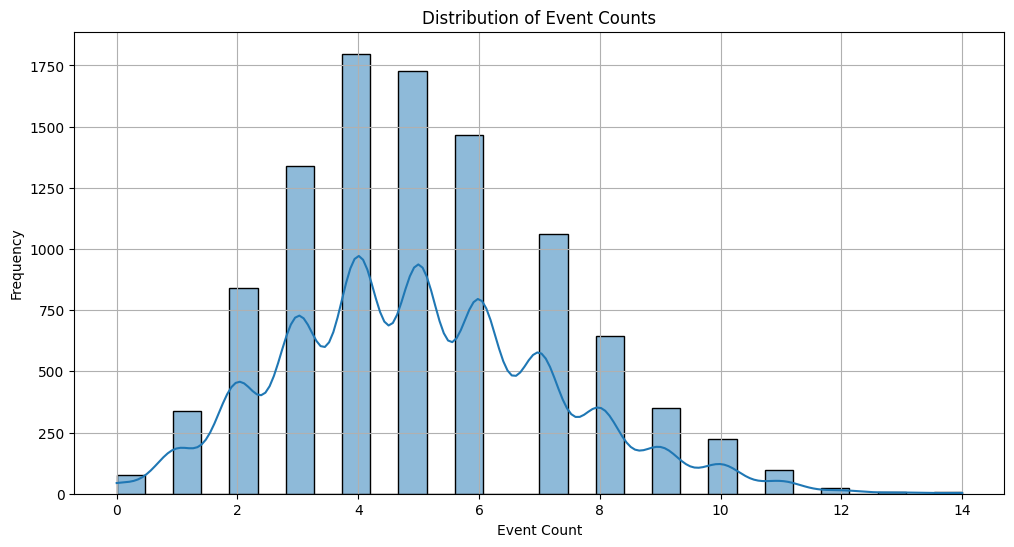

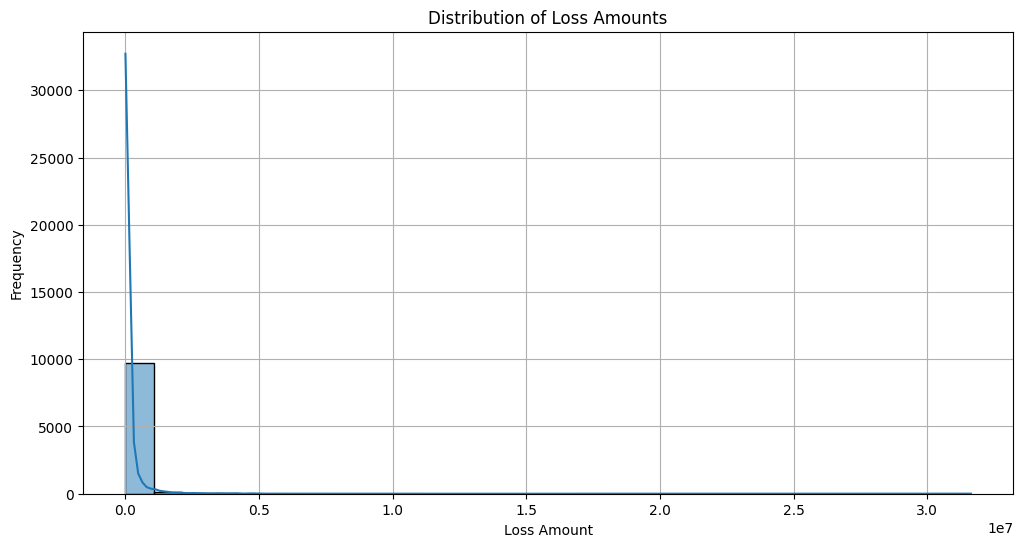

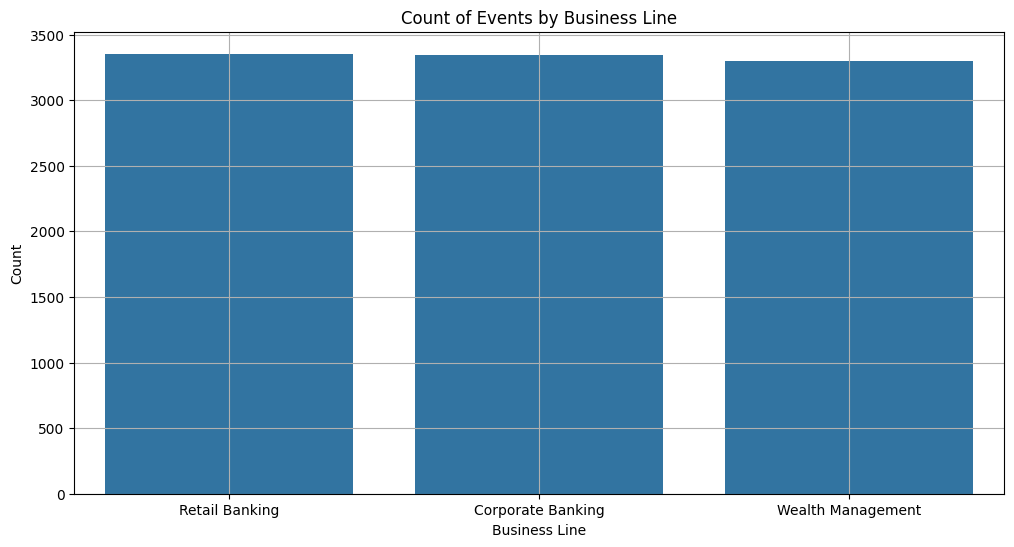

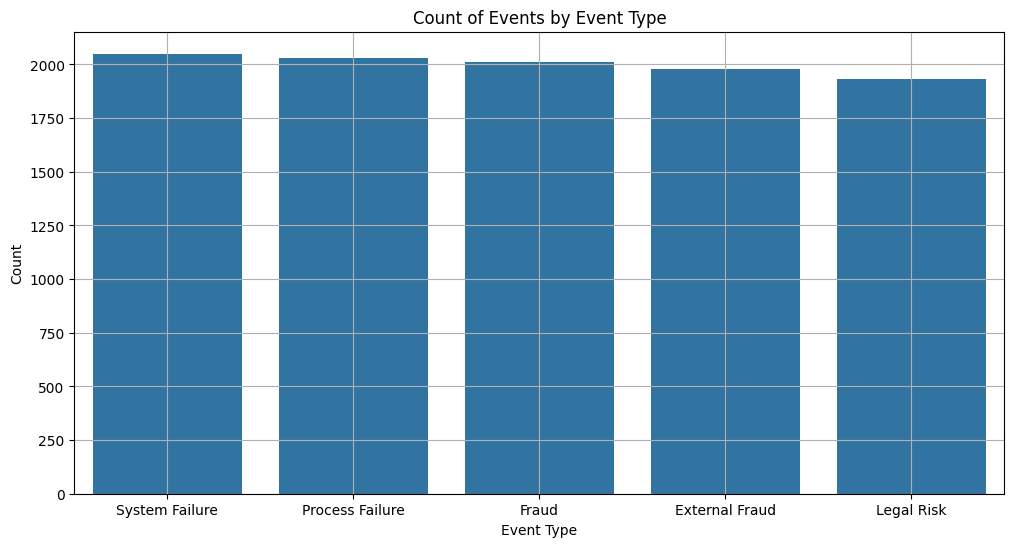

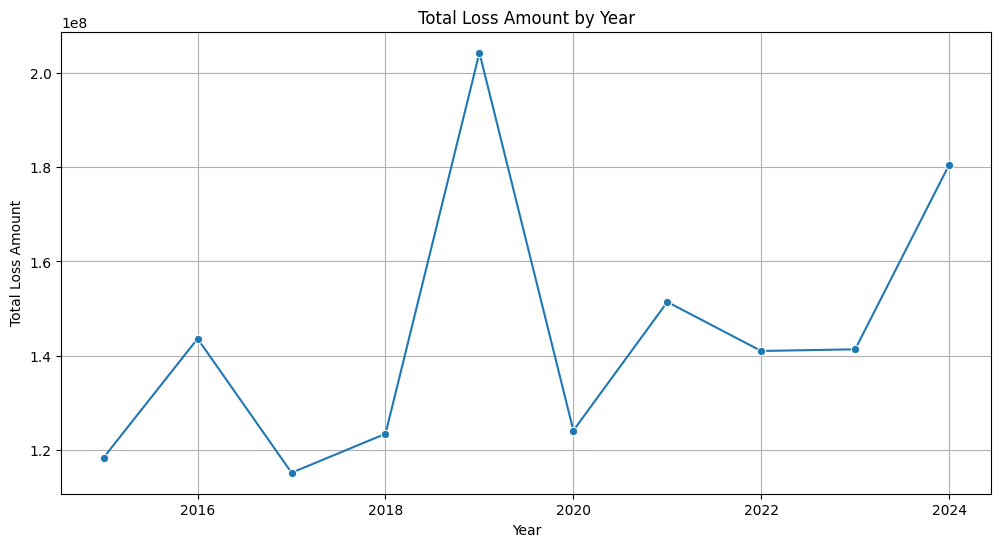

In [4]:
# Check the shape and data types
print(expanded_data.info())

# Descriptive statistics
print(expanded_data.describe())

# Distribution of Event Counts
plt.figure(figsize=(12, 6))
sns.histplot(expanded_data['Event Count'], bins=30, kde=True)
plt.title('Distribution of Event Counts')
plt.xlabel('Event Count')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Distribution of Loss Amounts
plt.figure(figsize=(12, 6))
sns.histplot(expanded_data['Loss Amount'], bins=30, kde=True)
plt.title('Distribution of Loss Amounts')
plt.xlabel('Loss Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Count of Events by Business Line
plt.figure(figsize=(12, 6))
sns.countplot(data=expanded_data, x='Business Line', order=expanded_data['Business Line'].value_counts().index)
plt.title('Count of Events by Business Line')
plt.xlabel('Business Line')
plt.ylabel('Count')
plt.grid()
plt.show()

# Count of Events by Event Type
plt.figure(figsize=(12, 6))
sns.countplot(data=expanded_data, x='Event Type', order=expanded_data['Event Type'].value_counts().index)
plt.title('Count of Events by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.grid()
plt.show()

# Time series analysis of Loss Amount over the years
expanded_data['Year'] = expanded_data['Date'].dt.year
annual_loss = expanded_data.groupby('Year')['Loss Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_loss, x='Year', y='Loss Amount', marker='o')
plt.title('Total Loss Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Loss Amount')
plt.grid()
plt.show()


3. Summary of Findings
After running the above analysis, you can summarize your findings as follows:

Event Counts: The distribution of event counts appears to follow a Poisson distribution with a mean of approximately 5, as designed. Most entries have relatively few events, with fewer instances of high event counts.

Loss Amount Distribution: The loss amounts are right-skewed, indicating a heavy-tailed distribution, typical of financial losses where a small number of events account for a large amount of loss.

Business Line Insights: The count of events varies across business lines. For instance, one business line may have significantly more events than others, indicating potential risk areas that need to be monitored.

Event Type Analysis: Similar to business lines, different event types may also show variation in occurrence. Certain event types may be more prevalent, suggesting areas for preventive measures.

Temporal Trends: The time series analysis shows how total losses have changed over the years, providing insights into whether losses are increasing or stabilizing.

4. Further Analysis
Depending on your needs, you could also perform the following additional analyses:

Correlation Analysis: To understand how different variables relate to each other.
Frequency-Severity Analysis: To model the distribution of frequency and severity of events.
Value at Risk (VaR) Calculations: Using various distributions to assess the potential loss in financial terms.
This framework provides a solid starting point for a comprehensive analysis of the dataset, highlighting trends, distributions, and potential risk factors in your data. Let me know if you need further elaboration on any specific part!